# Which stations and routes are the most popular and who is likely to use them? 
## by Jagdeep Singh

## Investigation Overview

The goal for this presentation is to get some idea of which of the routes for the ford go bikes is most likey to be used most and which of the stations is most popular. 

## Dataset Overview

The dataset is for the year of 2017 and is has 15 columns, which range from duration of rides to member gender. some will be more useful then others. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Loading in the data
df = pd.read_csv('2017-fordgobike-tripdata.csv')


In [5]:
df_copy = df

In [6]:
#removinig the missiing values 
df_copy =df_copy.dropna()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453159 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               453159 non-null int64
start_time                 453159 non-null object
end_time                   453159 non-null object
start_station_id           453159 non-null int64
start_station_name         453159 non-null object
start_station_latitude     453159 non-null float64
start_station_longitude    453159 non-null float64
end_station_id             453159 non-null int64
end_station_name           453159 non-null object
end_station_latitude       453159 non-null float64
end_station_longitude      453159 non-null float64
bike_id                    453159 non-null int64
user_type                  453159 non-null object
member_birth_year          453159 non-null float64
member_gender              453159 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 55.3+ MB


In [7]:
#double check for any duplicates 
df_copy.duplicated(subset=['bike_id','start_time']).value_counts()

False    453159
dtype: int64

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Most popular stations
By plotting the most popular stations for both start and ending points it is possible to see the ponts in the city which will require the most bikes. Also which routes is most like to be taken. San Francisco Caltrain (Townsend St at 4th St) with its two stations ib by far the most used therefore an asuumption can be made that this route will be used by most users.    

In [8]:
pop_start_station = []
pop_start_stationr = []
pop_start_station =df_copy.start_station_name.value_counts()
pop_start_stationr =pop_start_station[pop_start_station > 2000]
pop_start_stationr.head()

San Francisco Caltrain (Townsend St at 4th St)               11929
San Francisco Caltrain Station 2  (Townsend St at 4th St)    11627
San Francisco Ferry Building (Harry Bridges Plaza)           11507
Market St at 10th St                                         10910
Berry St at 4th St                                           10140
Name: start_station_name, dtype: int64

Text(0, 0.5, 'Popularity')

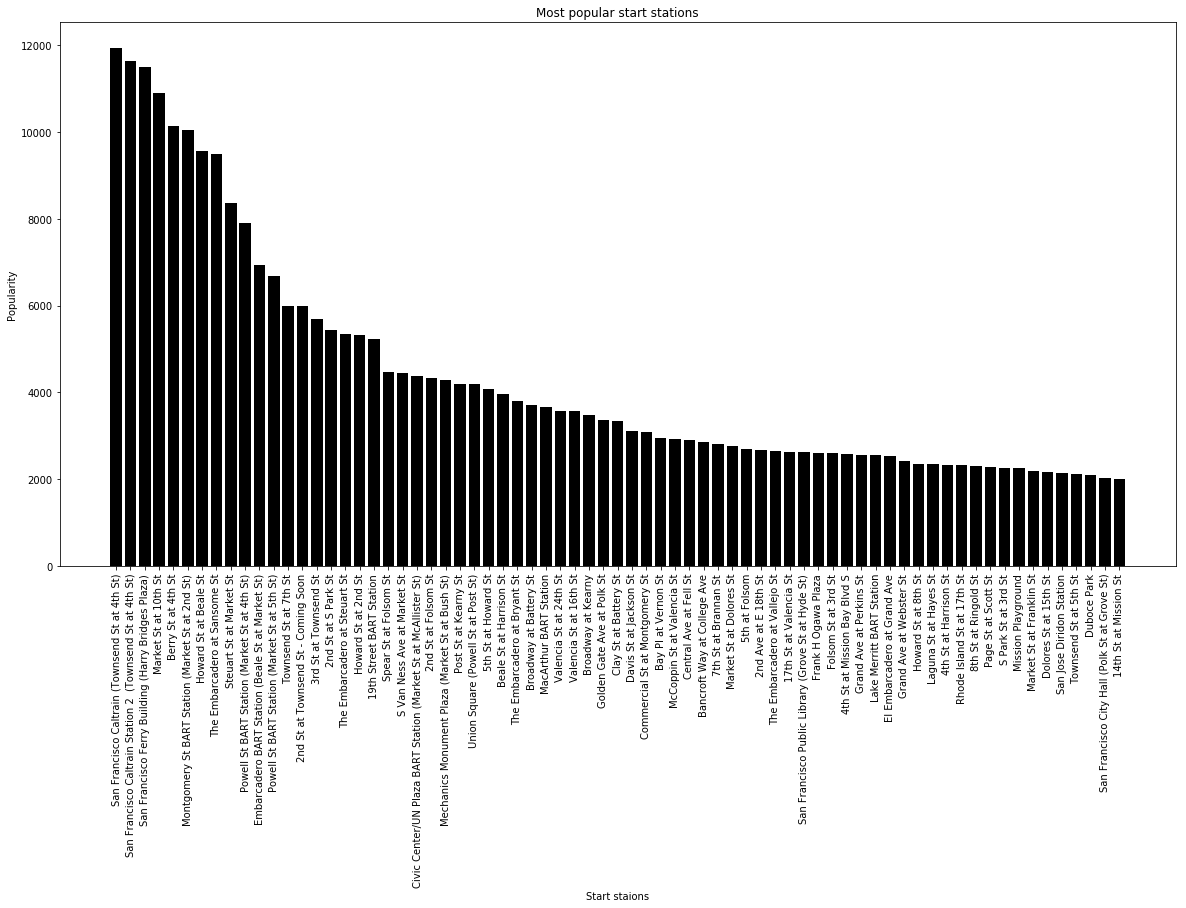

In [9]:
plt.bar(pop_start_stationr.index,pop_start_stationr, color=(0,0,0))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches( 20, 10)
plt.title('Most popular start stations')
plt.xlabel('Start staions')
plt.ylabel('Popularity')

In [10]:
pop_end_station = []
pop_end_stationr = []
pop_end_station =df_copy.end_station_name.value_counts()
pop_end_stationr =pop_end_station[pop_end_station > 2000]
pop_end_stationr.head()

San Francisco Caltrain (Townsend St at 4th St)               16698
San Francisco Ferry Building (Harry Bridges Plaza)           13579
San Francisco Caltrain Station 2  (Townsend St at 4th St)    13108
Montgomery St BART Station (Market St at 2nd St)             12324
The Embarcadero at Sansome St                                10548
Name: end_station_name, dtype: int64

Text(0, 0.5, 'Popularity')

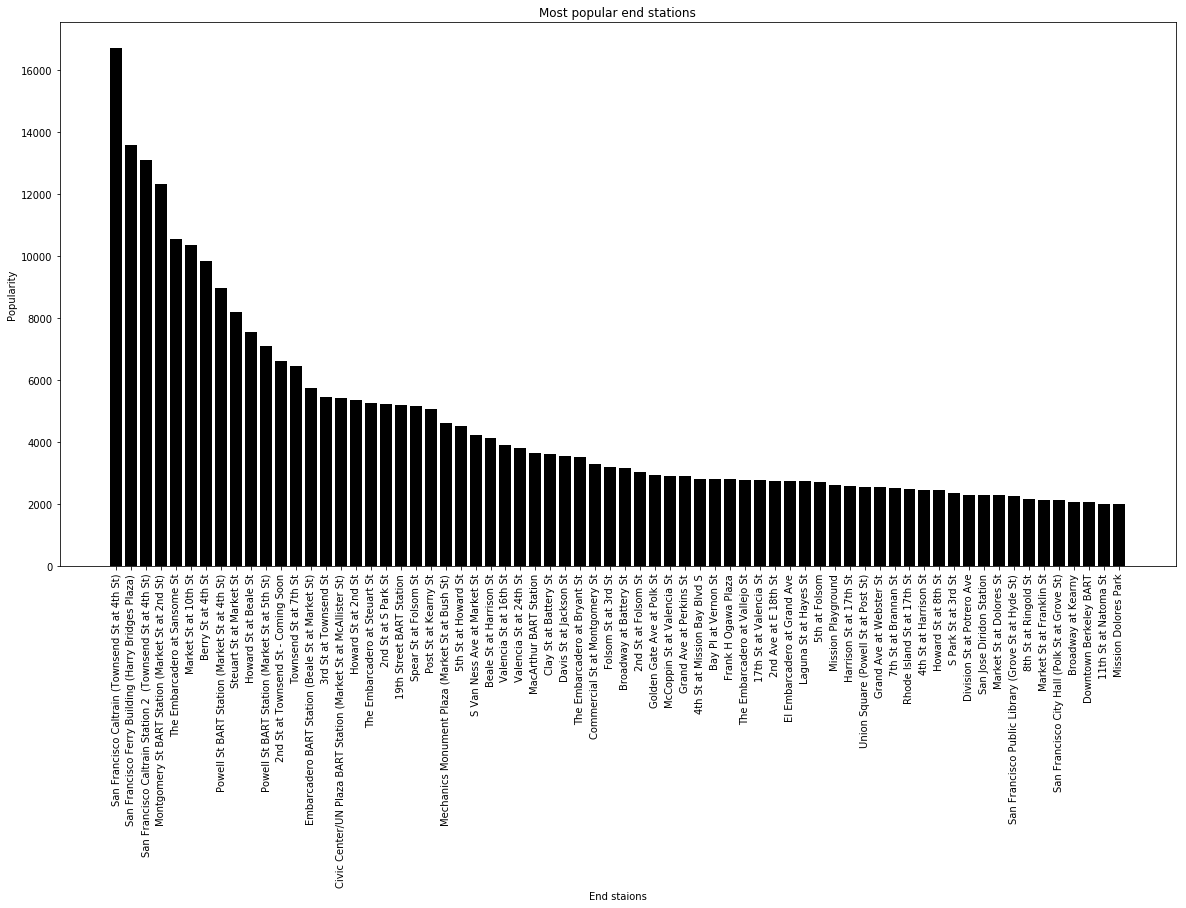

In [11]:
plt.bar(pop_end_stationr.index,pop_end_stationr, color=(0,0,0))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches( 20, 10)
plt.title('Most popular end stations')
plt.xlabel('End staions')
plt.ylabel('Popularity')

## The ages range of users

The age range of users can be seen here, having a good grasp of what type of user is the most likely to use the service is advantageous for advertising purposes. The age ranges of users is from 20 to 80 years old but the bulk of users are aged between 30 to 50 years olds. 

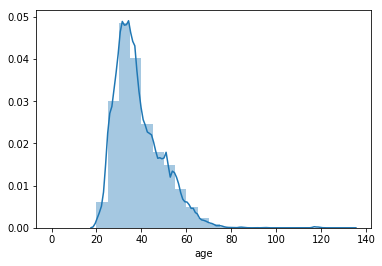

In [13]:
b=np.arange(0,90,5)
sb.distplot(2019-df_copy['member_birth_year'],axlabel='age',bins=b)

## Gender of users and if they are customers or subscribers 

Most users of the service are male regardless of if they are customers or subscribers. However the proportion of how many are members vs how many are customers is almost the same for both. So a users is likely to be a subscriber and more of a effort could be made to cater towards female users.   

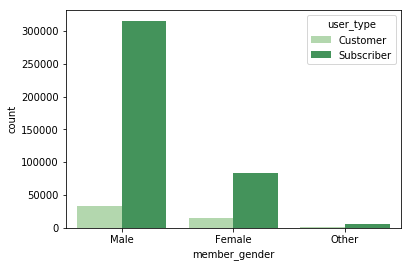

In [14]:
sb.countplot(data = df_copy, x = 'member_gender', hue = 'user_type', palette = 'Greens')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_gobikes.ipynb.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!